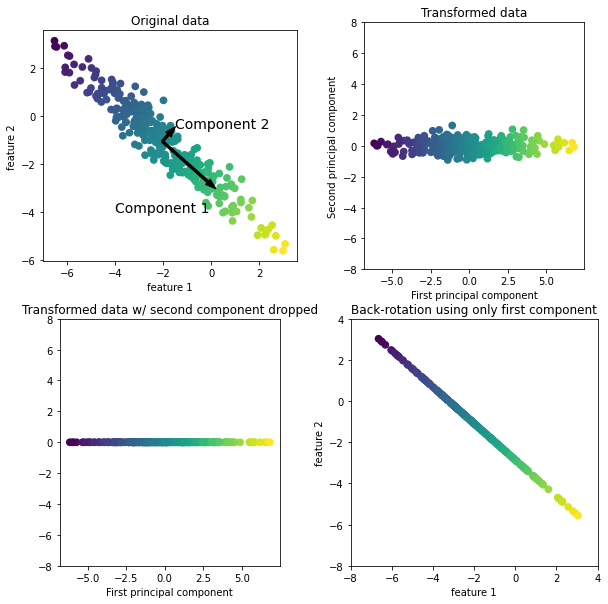

In [1]:
import mglearn

mglearn.plots.plot_pca_illustration()

## 사람 얼굴 이미지 데이터 셋을 이용한 PCA 예제 실습

In [2]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
people = fetch_lfw_people(min_faces_per_person=20,
                          resize=0.7 )

print( people.keys() )
print("이미지 행렬 : ", people.images.shape )
print("사람 : ", people.target_names )

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
이미지 행렬 :  (3023, 87, 65)
사람 :  ['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Carlos Menem' 'Colin Powell'
 'David Beckham' 'Donald Rumsfeld' 'George Robertson' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Gray Davis'
 'Guillermo Coria' 'Hamid Karzai' 'Hans Blix' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Aniston'
 'Jennifer Capriati' 'Jennifer Lopez' 'Jeremy Greenstock' 'Jiang Zemin'
 'John Ashcroft' 'John Negroponte' 'Jose Maria Aznar'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lindsay Davenport' 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva'
 'Mahmoud Abbas' 'Megawati Sukarnoputri' 'Michael Bloomberg' 'Naomi Watts'
 'Nestor Kirchner' 'Paul Bremer' 'Pete Sampras' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' '

In [5]:
people.images[0]

array([[ 57.      ,  60.333332,  78.      , ...,  40.666668,  36.666668,
         34.      ],
       [ 52.666668,  60.      ,  92.      , ...,  46.666668,  36.      ,
         30.      ],
       [ 46.      ,  66.      , 113.333336, ...,  51.      ,  43.333332,
         37.666668],
       ...,
       [ 61.      ,  62.666668,  62.333332, ...,  19.      ,  18.333334,
         18.666666],
       [ 62.666668,  64.666664,  67.      , ...,  17.333334,  18.      ,
         22.333334],
       [ 65.333336,  68.      ,  67.      , ...,  17.333334,  16.666666,
         22.666666]], dtype=float32)

### 얼굴 이미지 10개 표시하기

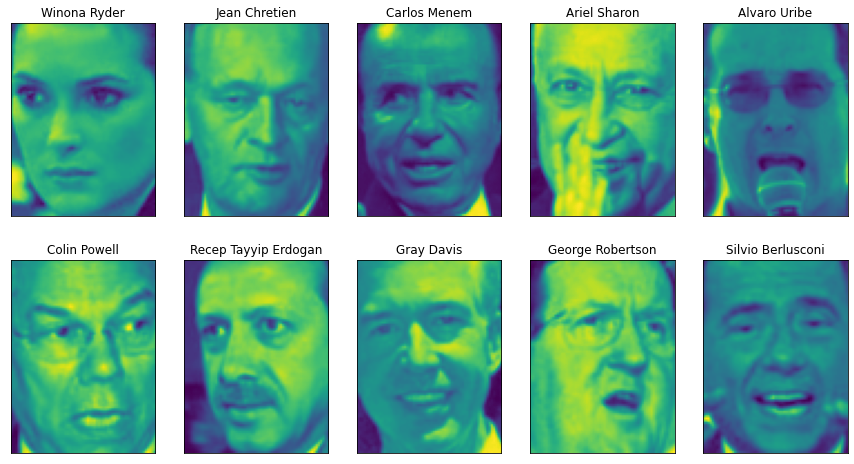

In [7]:
fig, axes = plt.subplots( 2, 5, figsize=(15,8), subplot_kw = {'xticks':(), 'yticks':()} ) 
# {'xticks':(), 'yticks':()} : 축이름 없애기

for target, image, ax in zip( people.target, people.images, axes.ravel() ): # axes.ravel() : 다차원 배열을 1차원 배열로 바꿔준다.
    ax.imshow(image)
    ax.set_title(people.target_names[target])

### 각 사람의 이미지는 몇장씩 있는가?

In [8]:
people.target[0:10]

array([61, 25,  9,  5,  1, 10, 48, 17, 13, 54], dtype=int64)

In [9]:
counts = np.bincount(people.target)
print(counts)

[ 39  35  21  36  20  77  42  24  29  21 236  31 121  22 530 109  44  26
  30  22  39  71  20  28  52  55  21  42  21  24  20  53  31  23  28  60
  32  41  22  41  48  29  33  20  22  37  20  22  30  27  32  26  23  52
  33  23  25  33 144  32  49  24]


In [10]:
people.target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Amelie Mauresmo',
       'Andre Agassi', 'Angelina Jolie', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Atal Bihari Vajpayee', 'Bill Clinton',
       'Carlos Menem', 'Colin Powell', 'David Beckham', 'Donald Rumsfeld',
       'George Robertson', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Gray Davis', 'Guillermo Coria',
       'Hamid Karzai', 'Hans Blix', 'Hugo Chavez', 'Igor Ivanov',
       'Jack Straw', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Aniston', 'Jennifer Capriati', 'Jennifer Lopez',
       'Jeremy Greenstock', 'Jiang Zemin', 'John Ashcroft',
       'John Negroponte', 'Jose Maria Aznar', 'Juan Carlos Ferrero',
       'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush',
       'Lindsay Davenport', 'Lleyton Hewitt', 'Luiz Inacio Lula da Silva',
       'Mahmoud Abbas', 'Megawati Sukarnoputri', 'Michael Bloomberg',
       'Naomi Watts', 'Nestor Kirchner', 'Paul Bremer', 'Pete Sampras',
       'Rece

In [11]:
### 타깃(사람)의 이름과 각 사람별 데이터 개수 출력.
for i, (count, name) in enumerate( zip(counts, people.target_names) ):
    print("{0:25} {1:3}".format(name, count), end= '   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [12]:
### 타깃(사람)의 이름과 각 사람별 데이터 개수 출력.(2사람, 1줄에)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:5}, {1:25}".format(count, name), end="   ")
    if (i + 1) % 2 == 0:
        print()

   39, Alejandro Toledo               35, Alvaro Uribe                
   21, Amelie Mauresmo                36, Andre Agassi                
   20, Angelina Jolie                 77, Ariel Sharon                
   42, Arnold Schwarzenegger          24, Atal Bihari Vajpayee        
   29, Bill Clinton                   21, Carlos Menem                
  236, Colin Powell                   31, David Beckham               
  121, Donald Rumsfeld                22, George Robertson            
  530, George W Bush                 109, Gerhard Schroeder           
   44, Gloria Macapagal Arroyo        26, Gray Davis                  
   30, Guillermo Coria                22, Hamid Karzai                
   39, Hans Blix                      71, Hugo Chavez                 
   20, Igor Ivanov                    28, Jack Straw                  
   52, Jacques Chirac                 55, Jean Chretien               
   21, Jennifer Aniston               42, Jennifer Capriati           
   21,

### 50개씩 데이터를 추출하기 위해..

In [15]:
nums = people.target.shape
mask = np.zeros(nums, dtype=np.bool)
mask.shape

<ipython-input-15-9482513aeb95>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(nums, dtype=np.bool)


(3023,)

In [17]:
nums = np.unique(people.target)
nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], dtype=int64)

In [18]:
for target in nums:
    mask[np.where(people.target==target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people.shape, y_people.shape

((2063, 5655), (2063,))

## 주어진 데이터를 이용해서 지도학습 모델에 적용시켜보자.

In [19]:
# 0 ~ 255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 같습니다.
X_people = X_people / 255.
print(X_people.shape)

(2063, 5655)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

# 이웃 개수를 한 개로 하여 KNeightborsClassifier 모델을 만든다.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수:{:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수:0.23


## PCA를 이용해서 87 x 65(=5655)의 특징을 갖는 성분을 100개의 주성분으로 추출.

In [21]:
from sklearn.decomposition import PCA

In [22]:
# 화이트닝 옵션은 PCA변환을 할 때 이 표준편차를 나누어 적용. 
# PCA 변환은 데이터의 평균을 0으로 만들어주므로 
# 화이트닝을 적용하는 것은 PCA변환한 뒤에 StandardScaler를 적용하는 것과 같다.
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)
print("X_test_pca.shape:", X_test_pca.shape)

X_train_pca.shape: (1547, 100)
X_test_pca.shape: (516, 100)


In [23]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)

print("테스트 정확도 : {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 정확도 : 0.31


* 모델의 정확도가 23%에서 31%로 향상

## 주성분 이미지 확인

In [25]:
# 한글
import matplotlib
from matplotlib import font_manager, rc
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

### 각각의 주성분 그래프로 확인해 보기

pca.components_.shape  (100, 5655)


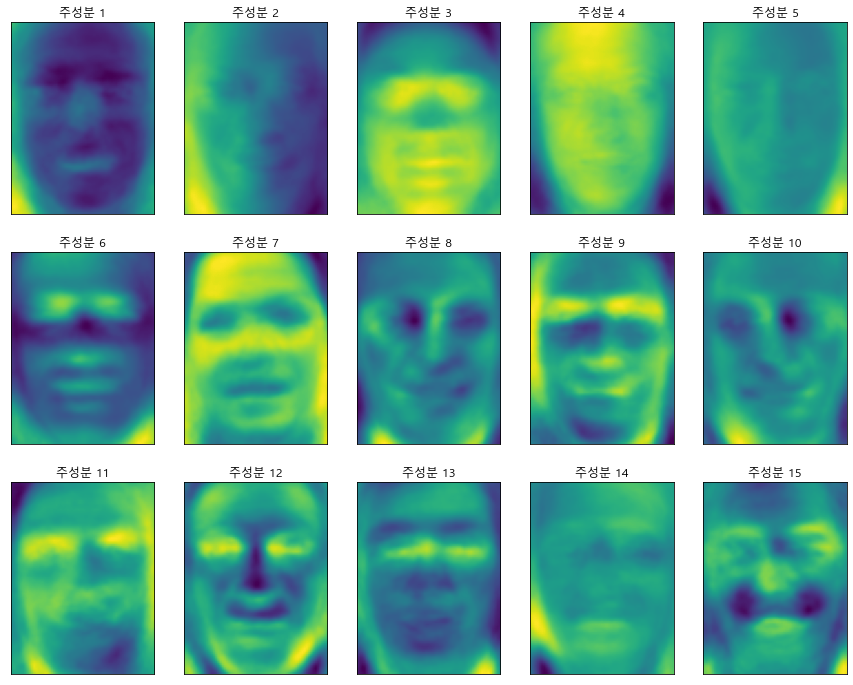

In [27]:
image_shape = people.images[0].shape      # 3023장의 이미지
print("pca.components_.shape ", pca.components_.shape)

fig, axes = plt.subplots(3, 5, figsize=(15,12),
                        subplot_kw={'xticks':(), 'yticks':() })

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap="viridis")
    ax.set_title("주성분 {}".format((i+1)))

* 이 주성분을 전부 이해할 수 없다.
    * 첫번째 주성분은 얼굴과 배경의 명암 차이를 기록한 것.
    * 두번째 주성분은 오른쪽과 왼쪽 조명의 차이를 담고 있는 것.
* PCA 모델은 픽셀을 기반으로 하므로 얼굴의 배치와 조명이 두 이미지에 얼마나 비슷한지 판단하는 데 큰 영향을 준다.

## 주성분의 일부를 사용하여 이미지 재구성

* 몇 개의 주성분으로 데이터를 줄이고 원래 공간으로 되돌릴 수 있음.

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 4.8s, 0.1min


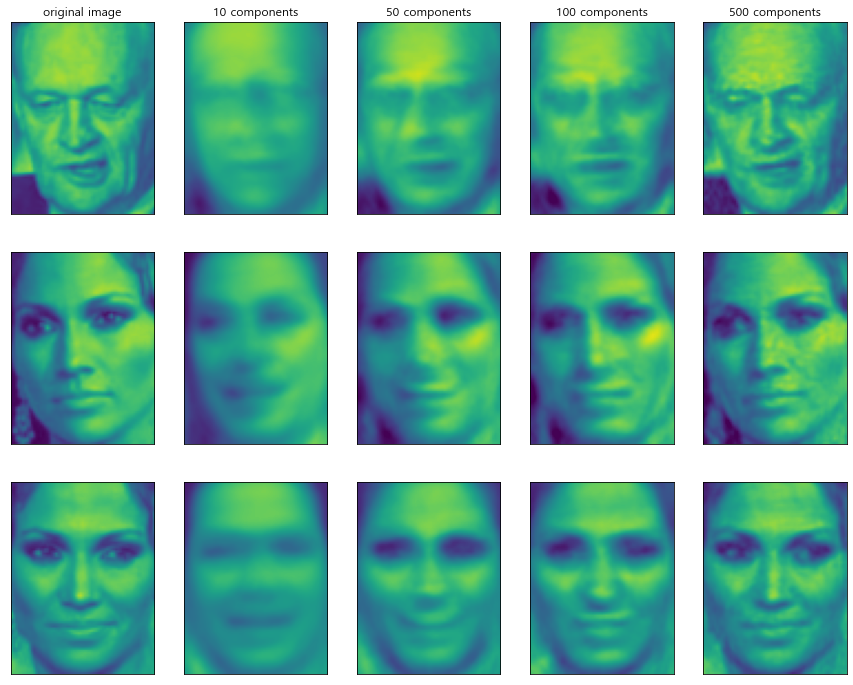

In [30]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

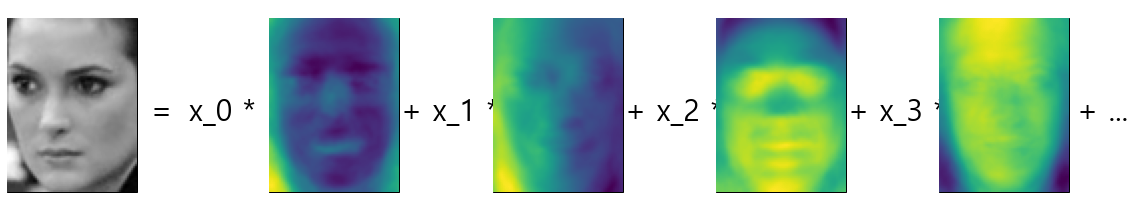

In [31]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

image_shape = people.images[0].shape
plt.figure(figsize=(20, 3))
ax = plt.gca()

imagebox = OffsetImage(people.images[0], zoom=2, cmap="gray")
ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
ax.add_artist(ab)

for i in range(4):
    imagebox = OffsetImage(pca.components_[i].reshape(image_shape), zoom=2,
                           cmap="viridis")

    ab = AnnotationBbox(imagebox, (.285 + .2 * i, 0.4),
                        pad=0.0, xycoords='data')
    ax.add_artist(ab)
    if i == 0:
        plt.text(.155, .3, 'x_{} *'.format(i), fontdict={'fontsize': 30})
    else:
        plt.text(.145 + .2 * i, .3, '+ x_{} *'.format(i),
                 fontdict={'fontsize': 30})

plt.text(.95, .3, '+ ...', fontdict={'fontsize': 30})

plt.rc('text')
plt.text(.12, .3, '=', fontdict={'fontsize': 30})
plt.axis("off")
plt.show()
plt.close()
plt.rc('text')

## NMF 알고리즘
* 유용한 특성을 뽑기 위한 또 다른 비지도 학습 알고리즘
* PCA와 비슷하고 차원 축소에도 사용이 가능합니다.

C:\Users\kbjoo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\kbjoo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


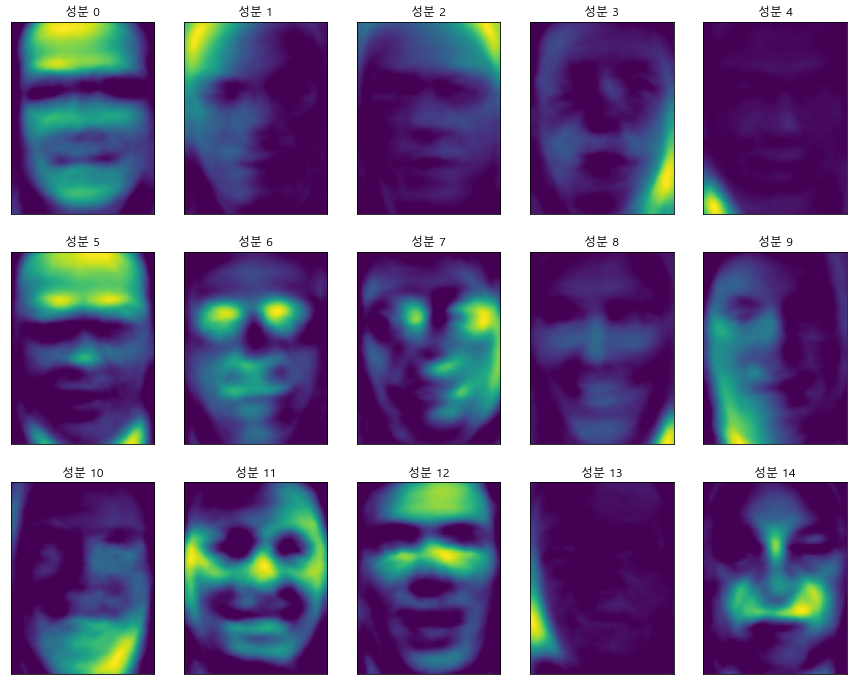

In [32]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분 {}".format(i))

* NMF보다 PCA사용시에 품질이 좋다.
* NMF는 데이터 인코딩과 재구성보다 데이터의 패턴을 찾는데 활용

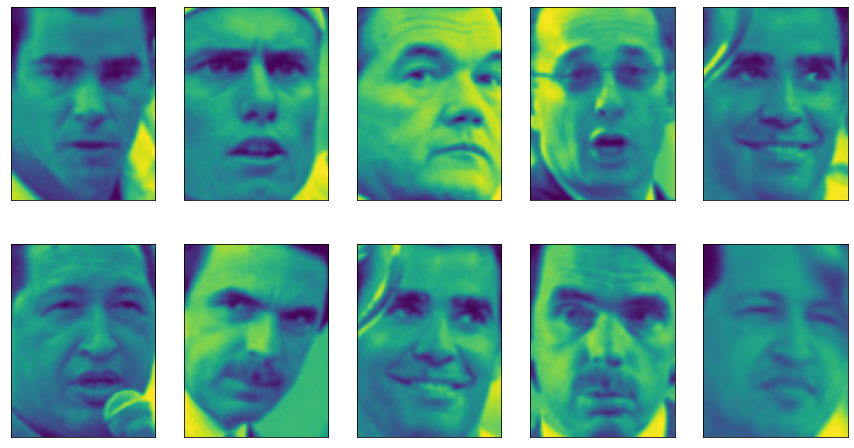

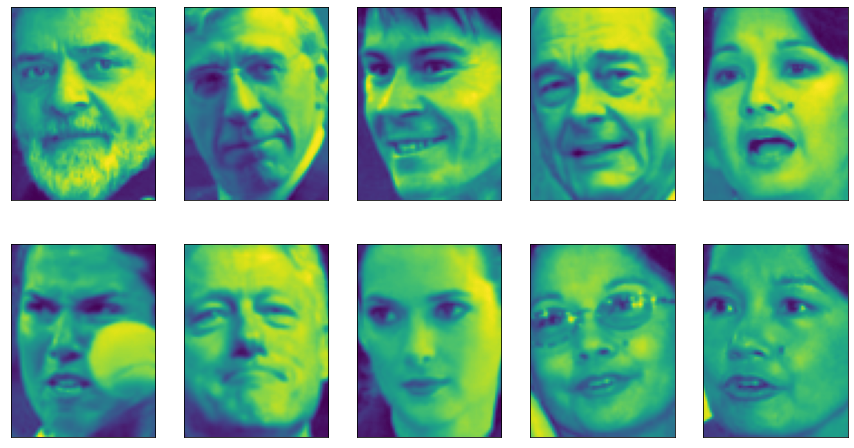

In [33]:
compn = 3
# 4번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn = 7
# 8번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

## 비지도학습
    * 비지도변환 : PCA, SVD, NMF, tSNE
    * 군집 : K-means, K-medoid, DBSCAN